<a href="https://colab.research.google.com/github/maddi-ajay/Diabetes-prediction/blob/main/DIABETES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DIABETES PREDICTION

Importing libraries

In [ ]:
#importing lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import tensorflow as tf


importing dataset from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/lab/diabetes.csv')
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
#finding out if the dataset contains any null values
#statistical summary
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print (df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


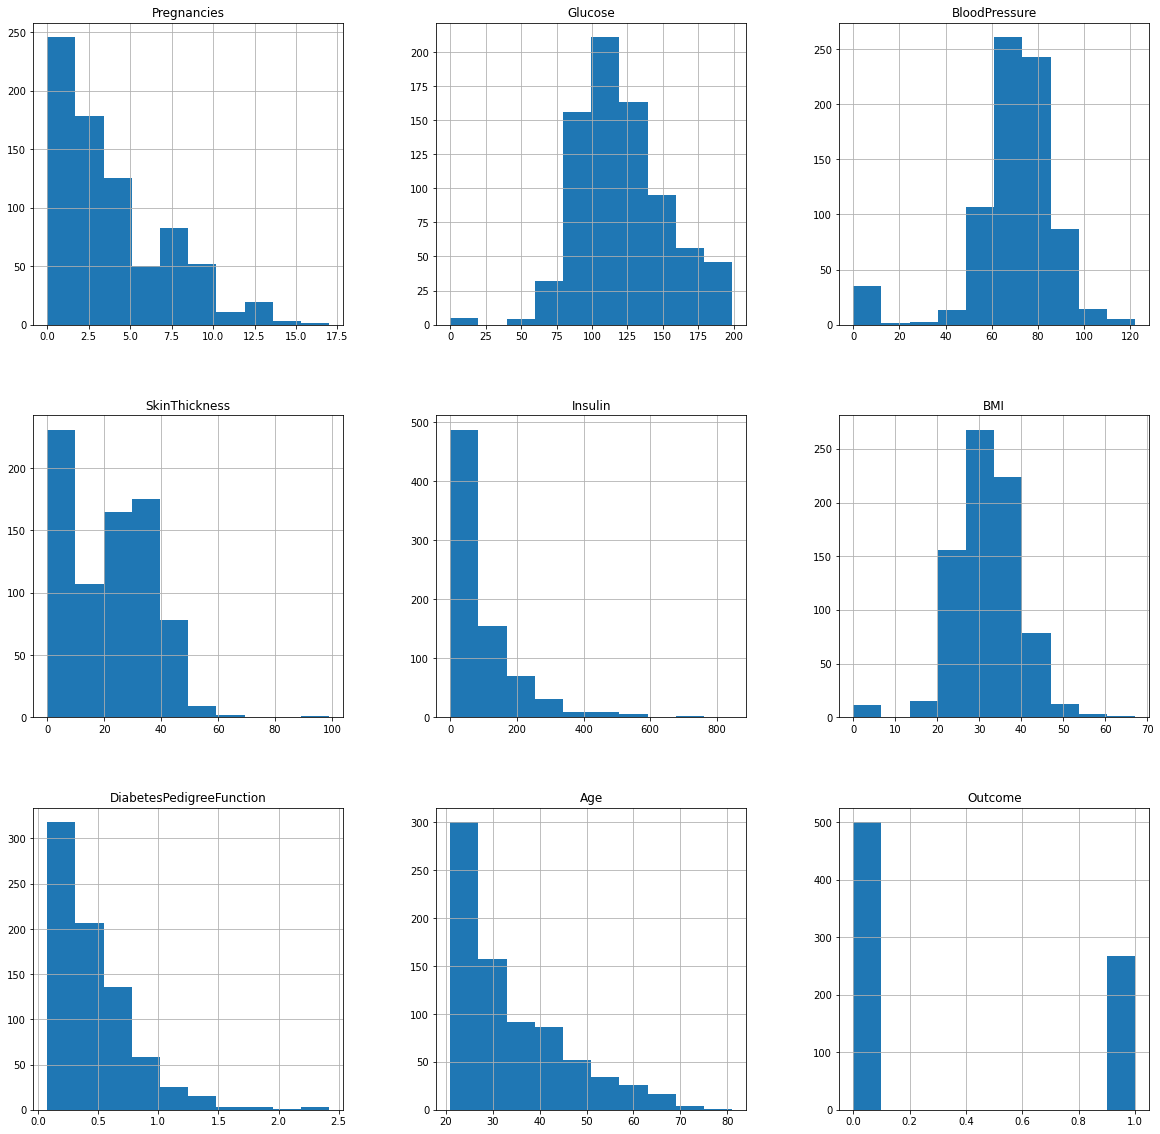

In [ ]:
p = df.hist(figsize = (20,20))

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df ['Insulin'] = df['Insulin'].fillna(0)
df['Glucose'] = df['Glucose'].fillna(0)
df['BloodPressure'] = df['BloodPressure'].fillna(0)
df ['SkinThickness'] = df['SkinThickness'].fillna(0)
df ['BMI'] = df['BMI'].fillna(0)

In [ ]:
x=df.drop('Outcome',axis=1)
print('x.shape: ',x.shape)
y=df['Outcome']
print('y.shape: ',y.shape)

x.shape:  (768, 8)
y.shape:  (768,)


Data cleaning

In [ ]:
#drop the duplicates
df=df.drop_duplicates()

In [ ]:
#check the shape after drop the duplicates
df.shape

(768, 9)

Model building

In [ ]:
#splitting the data
X = df.iloc[:, :-1]
y = df.iloc[:, [-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)


In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(537, 8) (231, 8) (537, 1) (231, 1)


Scaling the data

In [ ]:
#apply feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Logistic regression

In [ ]:
#building the model using Logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train,y_train)

y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#for training dataset
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred,y_train))
print(metrics.confusion_matrix(y_train_pred ,y_train))

0.7839851024208566
[[319  82]
 [ 34 102]]


In [ ]:
from sklearn.metrics import accuracy_score

Accuracy=accuracy_score(y_test_pred,y_test)
print('Accuracy:',Accuracy)

Accuracy: 0.7619047619047619


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test_pred,y_test))
confusion_matrix(y_test_pred,y_test)

              precision    recall  f1-score   support

           0       0.88      0.77      0.83       168
           1       0.55      0.73      0.63        63

    accuracy                           0.76       231
   macro avg       0.72      0.75      0.73       231
weighted avg       0.79      0.76      0.77       231



array([[130,  38],
       [ 17,  46]])

Random forest

In [ ]:
#building the model using random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn import metrics
print("accuracy_score =" ,metrics.accuracy_score(y_train_pred,y_train))
print(metrics.confusion_matrix(y_train_pred ,y_train))

accuracy_score = 1.0
[[353   0]
 [  0 184]]


here training data set is overfitted

In [ ]:
#for testing dataset
from sklearn.metrics import accuracy_score

Accuracy=accuracy_score(y_test_pred,y_test)
print('Accuracy:',Accuracy)

Accuracy: 0.7489177489177489


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test_pred,y_test))
confusion_matrix(y_test_pred,y_test)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       157
           1       0.60      0.68      0.63        74

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.76      0.75      0.75       231



array([[123,  34],
       [ 24,  50]])

SVM support vector Machine

In [ ]:
#apply feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [ ]:
from sklearn.svm import SVC
#linear model
model_linear = SVC(kernel='linear')
model_linear.fit(X_train,y_train)
y_train_pred = model_linear.predict(X_train)
y_test_pred = model_linear.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score

Accuracy=accuracy_score(y_test_pred,y_test)
print('Accuracy:',Accuracy)

Accuracy: 0.7792207792207793


In [ ]:
print("Confusion matrix :", metrics.confusion_matrix(y_test_pred ,y_test))

Confusion matrix : [[132  36]
 [ 15  48]]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test_pred,y_test))
confusion_matrix(y_test_pred,y_test)

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       168
           1       0.57      0.76      0.65        63

    accuracy                           0.78       231
   macro avg       0.73      0.77      0.75       231
weighted avg       0.81      0.78      0.79       231



array([[132,  36],
       [ 15,  48]])

ANN ARTIFICIAL NEURAL NETWORK

In [ ]:
#apply feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#initialising ANN
import tensorflow as tf
ann=tf.keras.models.Sequential()

In [ ]:
#adding first hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
#adding second hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
#adding output layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
#compiling Ann
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
#fitting ann
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
17/17 [==============================] - 1s 2ms/step - loss: 0.7490 - accuracy: 0.3482
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.7190 - accuracy: 0.4041
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5326
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6201
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.6685
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.6983
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.7002
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.6983
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6045 - accuracy: 0.7020
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5916 - accuracy: 0.7039
Epoch 11/

In [ ]:
y_test_pred=ann.predict(X_test)
y_test_pred=y_test_pred.round()
from sklearn.metrics import accuracy_score

Accuracy=accuracy_score(y_test_pred,y_test)
print('Accuracy:',Accuracy)


Accuracy: 0.7878787878787878


In [ ]:
print("Confusion matrix :", metrics.confusion_matrix(y_test_pred ,y_test))

Confusion matrix : [[127  29]
 [ 20  55]]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test_pred,y_test))
confusion_matrix(y_test_pred,y_test)

              precision    recall  f1-score   support

         0.0       0.86      0.81      0.84       156
         1.0       0.65      0.73      0.69        75

    accuracy                           0.79       231
   macro avg       0.76      0.77      0.77       231
weighted avg       0.80      0.79      0.79       231



array([[127,  29],
       [ 20,  55]])

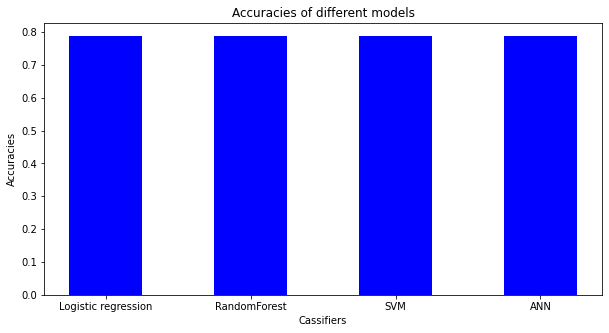

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data_dict = {'Logistic regression':Accuracy,'RandomForest':Accuracy, 'SVM' :Accuracy, 'ANN': Accuracy}
x = list(data_dict.keys())
y = list(data_dict.values())
fig =plt.figure(figsize=(10,5))
plt.bar(x, y, color='blue',width = 0.5)
plt.xlabel("Cassifiers")
plt.ylabel("Accuracies")
plt.title("Accuracies of different models")
plt.show()